# Automatic picking and event location

Creating files and directory structure required by NLLOC

In [1]:
%matplotlib inline

from microquake.core import Stream, event, station, ctl, read
from microquake.core import GridData
from microquake.core.stream import composite_traces
from microquake.waveform import pick
from microquake.waveform import mag
import microquake.nlloc as nll
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from microquake.spark import init_spark_from_params

In [2]:
# reading control file and ititializing a spark context
params = ctl.parse_control_file('input.xml')
sc = None
#sc = init_spark_from_params(params)

In [3]:
# Takes long time to run
# only run if it is the first time
nll_opts = nll.init_nlloc_from_params(params)
# nll_opts.prepare(create_time_grids=True, tar_files=False, SparkContext=sc)

Velocity model used to locate the event

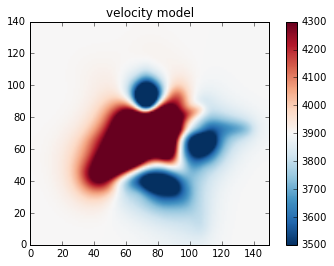

In [4]:
vp = params.velgrids.grids.vp
vs = params.velgrids.grids.vs
plt.imshow(vp.data[:,70,:].T, cmap=cm.RdBu_r)
plt.xlim([0,150])
plt.ylim([0,140])
plt.clim([3500, 4300])
cb = plt.colorbar()
plt.title('velocity model')

Automatic picking and event location

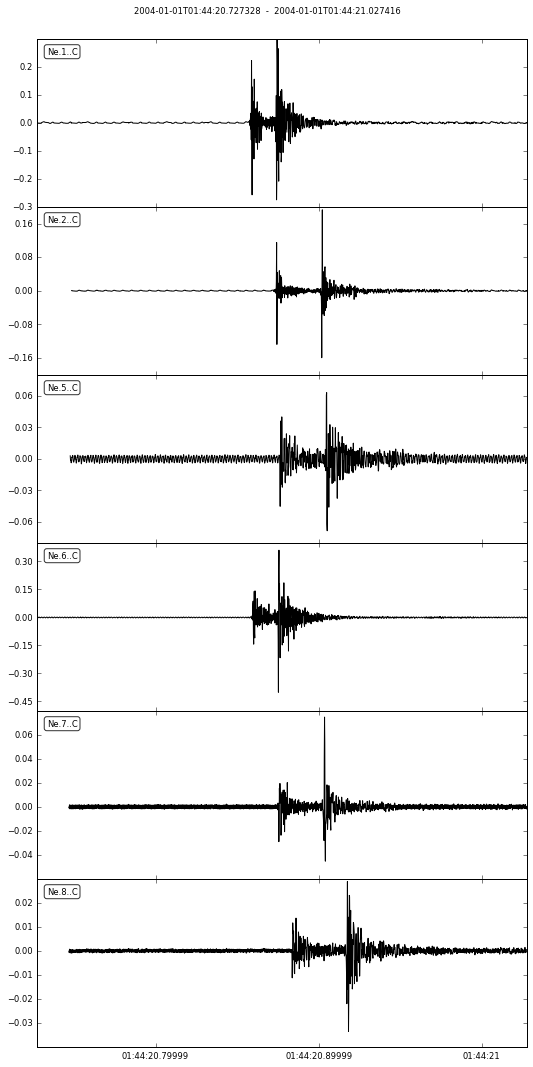

In [5]:
st = read('data_example.mseed')
composite_traces(st.copy()).plot(equal_scale=False)

In [6]:
site = params.sensors.site
st2 = st.copy()
evt = pick.automatic_picking(st2, site, params)
nll_opts.run_event(evt)
evt_mg = mag.moment_magnitude(st2, evt, site, vp, vs)

In [7]:
print evt_mg

Event:	2004-01-01T01:44:20.823100Z | 10856, 53468, 9500 | -1.32589607255 Mw | automatic


	   resource_id: ResourceIdentifier(id="smi:local/d9f6f1b0-e9f4-45ad-85e7-1fdf2f00ff0e")
	 creation_info: CreationInfo(author='microquake', version='0.1')
	---------
	         picks: 12 Elements
	       origins: 1 Elements
	    magnitudes: 1 Elements


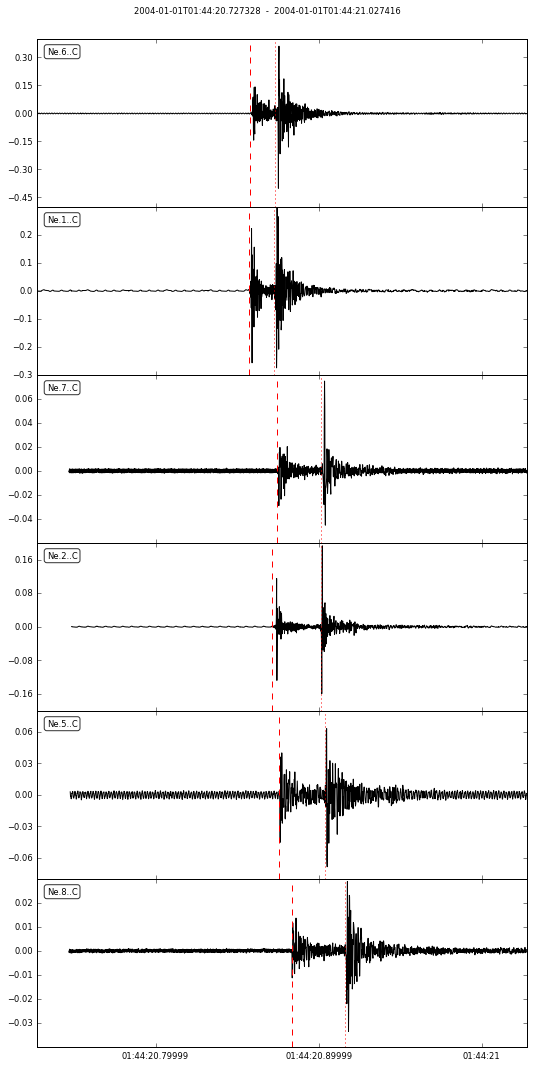

In [8]:
ct = composite_traces(st.copy())
ct.plot(equal_scale=False, event=evt_mg, site=site)

In [9]:
cat = event.Catalog(events=[evt_mg])
print cat
cat.write('data_example.xml', format='quakeml')

1 Event(s) in Catalog:
2004-01-01T01:44:20.823100Z | 10856, 53468, 9500 | -1.32589607255 Mw | automatic
